In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('tableau-colorblind10')

In [ ]:
# Dataset took from: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
# To facilitate the process:
# 1) Downloaded the rar folder
# 2) Changed file extension (from arff to csv)
# 3) Created a github repository to store the csv file

dataset_url = "https://github.com/erretim/MML_ckd/blob/8ea18c9cc234f259064c388b18c0e94f2a21db59/csv_result-chronic_kidney_disease_full.csv?raw=true"

df_data = pd.read_csv(dataset_url)
df_data.head().T # Transpose index and columns to better visualize the results

,0,1,2,3,4
id,1,2,3,4,5
'age',48,7,62,48,51
'bp',80,50,80,70,80
'sg',1.020,1.020,1.010,1.005,1.010
'al',1,4,2,4,2
'su',0,0,3,0,0
'rbc',?,?,normal,normal,normal
'pc',normal,normal,normal,abnormal,normal
'pcc',notpresent,notpresent,notpresent,present,notpresent
'ba',notpresent,notpresent,notpresent,notpresent,notpresent


In [ ]:
df_data.shape

(400, 26)

In [ ]:
# Remove id column
df_data.drop('id', axis = 1, inplace = True)

# Rename columns to better understand the meaning
df_data.columns = ['Age', 
                   'Blood Pressure', 
                   'Specific Gravity', 
                   'Albumin', 'Sugar', 
                   'Red Blood Cells', 
                   'Pus Cell',
                   'Pus Cell Clumps', 
                   'Bacteria', 
                   'Blood Glucose Random', 
                   'Blood Urea', 
                   'Serum Creatinine', 
                   'Sodium', 'Potassium', 
                   'Hemoglobin', 
                   'Packed Cell Volume', 
                   'White Blood Cell Count', 
                   'Red Blood Cell Count',
                   'Hypertension', 
                   'Diabetes Mellitus', 
                   'Coronary Artery Disease', 
                   'Appetite', 
                   'Pedal Edema',
                   'Anemia', 
                   'CKD']

# Replace all "?" with NaN to better visualize the data info
df_data.replace("?", np.nan, inplace=True)
df_data.head().T # Transpose index and columns to better visualize the results

,0,1,2,3,4
Age,48,7,62,48,51
Blood Pressure,80,50,80,70,80
Specific Gravity,1.020,1.020,1.010,1.005,1.010
Albumin,1,4,2,4,2
Sugar,0,0,3,0,0
Red Blood Cells,NaN,NaN,normal,normal,normal
Pus Cell,normal,normal,normal,abnormal,normal
Pus Cell Clumps,notpresent,notpresent,notpresent,present,notpresent
Bacteria,notpresent,notpresent,notpresent,notpresent,notpresent
Blood Glucose Random,121,NaN,423,117,106


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      391 non-null    object
 1   Blood Pressure           388 non-null    object
 2   Specific Gravity         353 non-null    object
 3   Albumin                  354 non-null    object
 4   Sugar                    351 non-null    object
 5   Red Blood Cells          248 non-null    object
 6   Pus Cell                 335 non-null    object
 7   Pus Cell Clumps          396 non-null    object
 8   Bacteria                 396 non-null    object
 9   Blood Glucose Random     356 non-null    object
 10  Blood Urea               381 non-null    object
 11  Serum Creatinine         383 non-null    object
 12  Sodium                   313 non-null    object
 13  Potassium                312 non-null    object
 14  Hemoglobin               348 non-null    o

In [ ]:
# Define numerical columns
numerical_attributes = ['Age',
                        'Blood Pressure', 
                        'Blood Glucose Random', 
                        'Blood Urea', 
                        'Serum Creatinine', 
                        'Sodium', 
                        'Potassium', 
                        'Hemoglobin', 
                        'Packed Cell Volume', 
                        'White Blood Cell Count', 
                        'Red Blood Cell Count',
                        'Specific Gravity',
                        "Albumin",
                        "Sugar"
                        ]

# Define categorical columns
nominal_attributes = [
                      'Red Blood Cells',
                      'Pus Cell',
                      'Pus Cell Clumps',
                      'Bacteria',
                      'Hypertension',
                      'Diabetes Mellitus',
                      'Coronary Artery Disease',
                      'Appetite',
                      'Pedal Edema',
                      'Anemia',
                      'CKD'
                      ]

In [ ]:
# Assign the correct data-type to the numerical features
df_data[numerical_attributes] = df_data[numerical_attributes].apply(pd.to_numeric)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      391 non-null    float64
 1   Blood Pressure           388 non-null    float64
 2   Specific Gravity         353 non-null    float64
 3   Albumin                  354 non-null    float64
 4   Sugar                    351 non-null    float64
 5   Red Blood Cells          248 non-null    object 
 6   Pus Cell                 335 non-null    object 
 7   Pus Cell Clumps          396 non-null    object 
 8   Bacteria                 396 non-null    object 
 9   Blood Glucose Random     356 non-null    float64
 10  Blood Urea               381 non-null    float64
 11  Serum Creatinine         383 non-null    float64
 12  Sodium                   313 non-null    float64
 13  Potassium                312 non-null    float64
 14  Hemoglobin               3

In [ ]:
# Perform descriptive statistics on numerical attributes
numerical_features = df_data[numerical_attributes]
numerical_features.describe().T # Transpose index and columns to better visualize the results

,count,mean,std,min,25%,50%,75%,max
Age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
Blood Pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
Blood Glucose Random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
Blood Urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
Serum Creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
Sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
Potassium,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000
Hemoglobin,348.0,12.526437,2.912587,3.100,10.30,12.65,15.00,17.800
Packed Cell Volume,329.0,38.884498,8.990105,9.000,32.00,40.00,45.00,54.000
White Blood Cell Count,294.0,8406.122449,2944.474190,2200.000,6500.00,8000.00,9800.00,26400.000


In [ ]:
# Perform descriptive statistics on nominal attributes 
nominal_features = df_data[nominal_attributes]
nominal_features.describe().T # Transpose index and columns to better visualize the results

,count,unique,top,freq
Red Blood Cells,248,2,normal,201
Pus Cell,335,2,normal,259
Pus Cell Clumps,396,2,notpresent,354
Bacteria,396,2,notpresent,374
Hypertension,398,2,no,251
Diabetes Mellitus,398,2,no,261
Coronary Artery Disease,398,2,no,364
Appetite,399,2,good,317
Pedal Edema,399,2,no,323
Anemia,399,2,no,339


In [ ]:
df_data.isna().sum().sort_values(ascending=False)


Red Blood Cells            152
Red Blood Cell Count       131
White Blood Cell Count     106
Potassium                   88
Sodium                      87
Packed Cell Volume          71
Pus Cell                    65
Hemoglobin                  52
Sugar                       49
Specific Gravity            47
Albumin                     46
Blood Glucose Random        44
Blood Urea                  19
Serum Creatinine            17
Blood Pressure              12
Age                          9
Bacteria                     4
Pus Cell Clumps              4
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
CKD                          0
dtype: int64

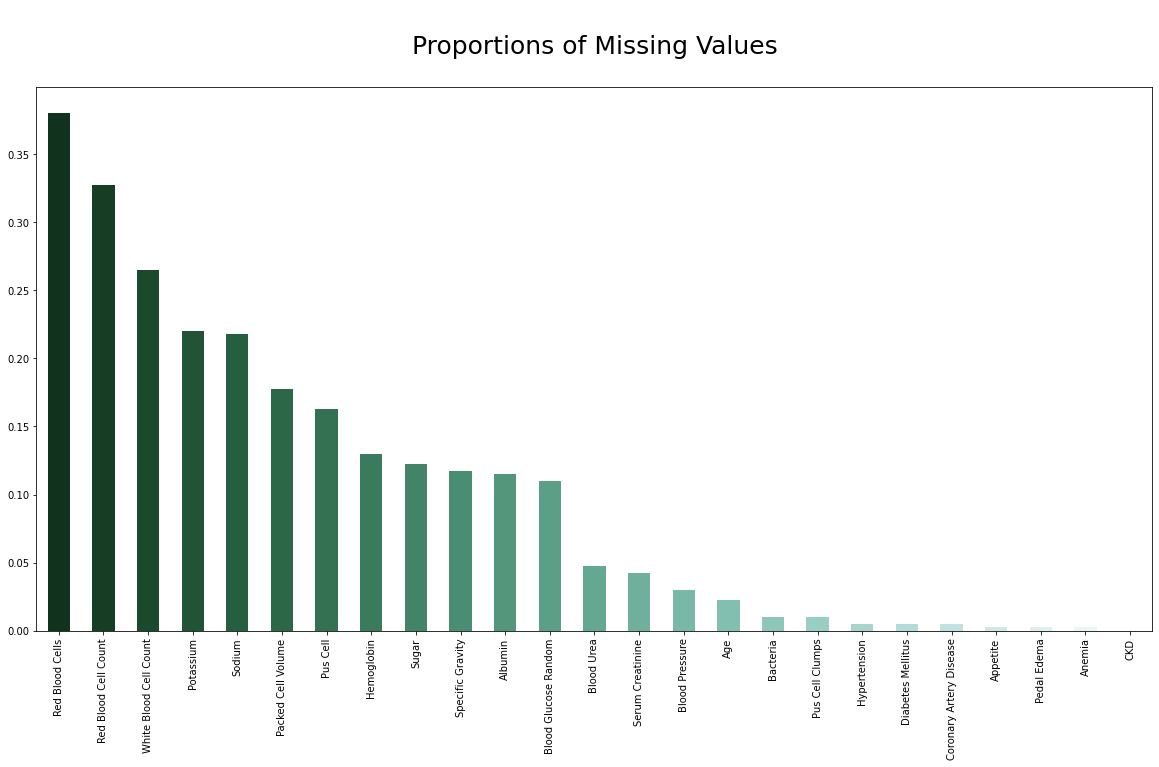

In [ ]:
missing = ((df_data.isnull().sum()/df_data.shape[0])).sort_values(ascending=False)
missing.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=0.15,
                                    dark=0.15,
                                    light=0.95,
                                    reverse=True,
                                    n_colors=24),
        figsize=(20,10))
plt.title("\nProportions of Missing Values\n",fontsize=25)
plt.show()

# **DISTRIBUTION OF NUMERICAL FEATURES**

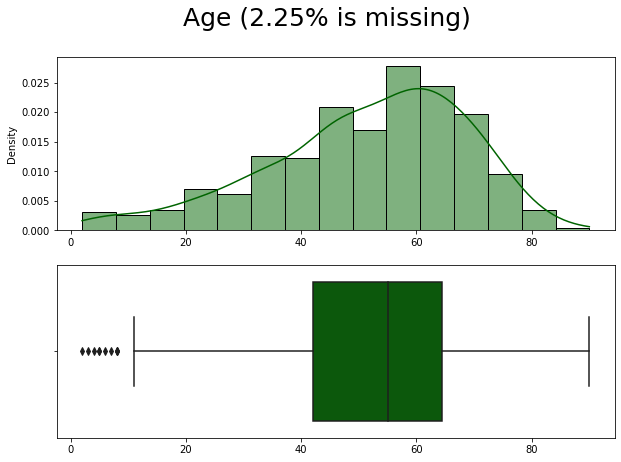

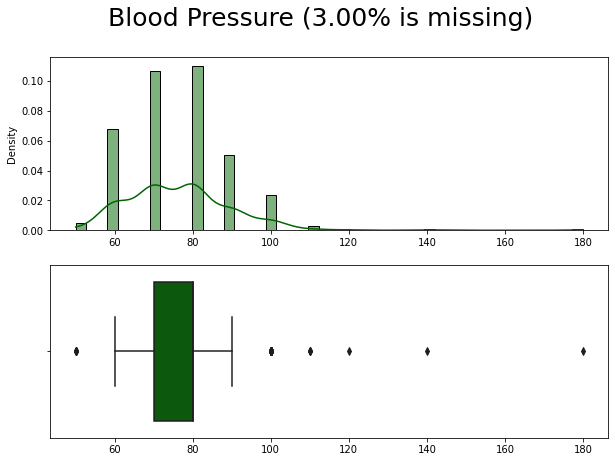

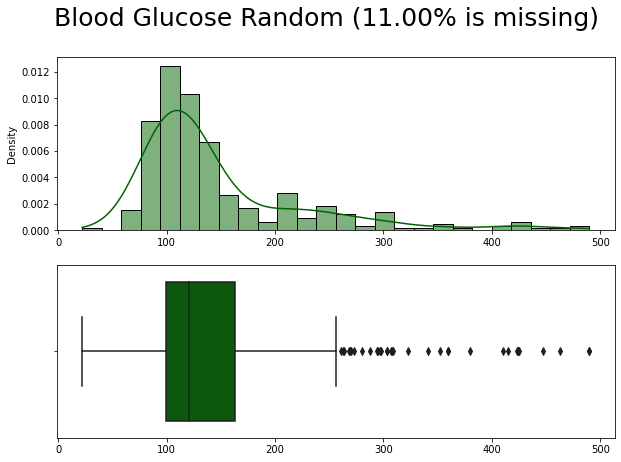

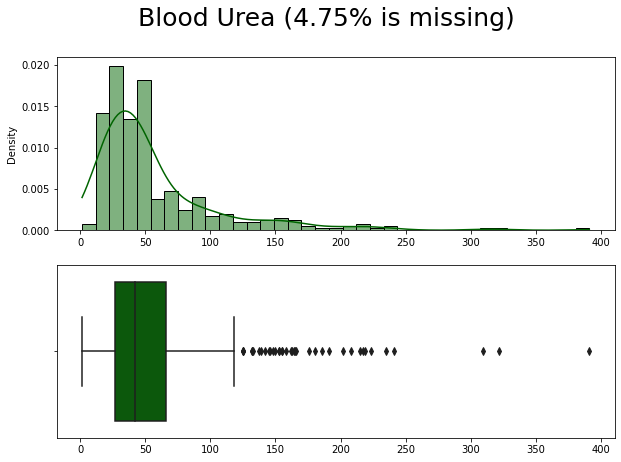

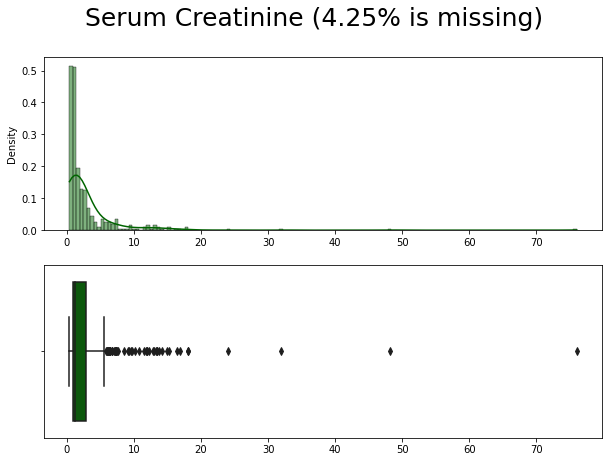

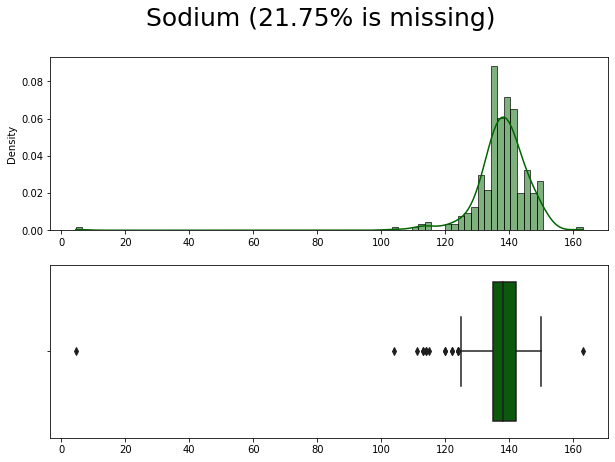

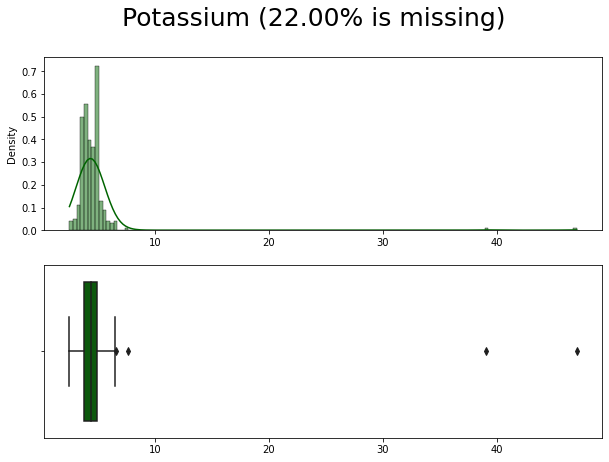

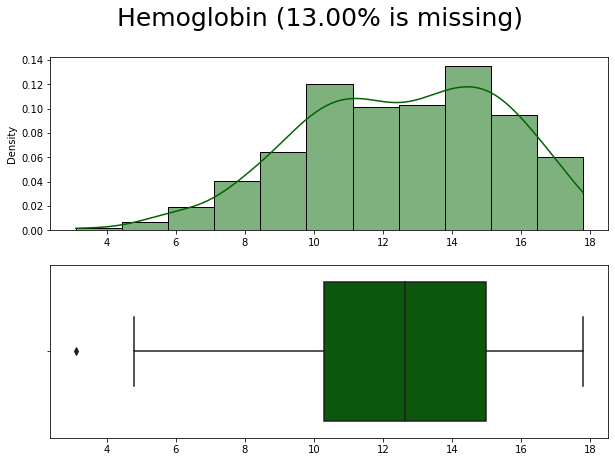

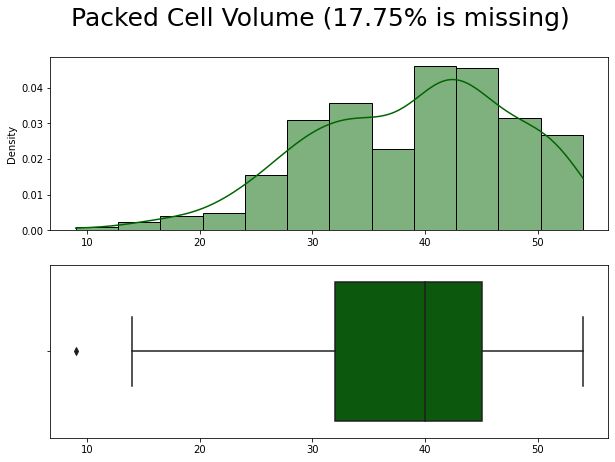

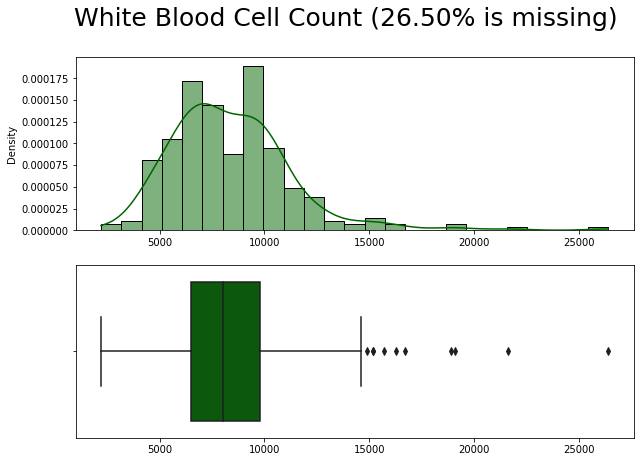

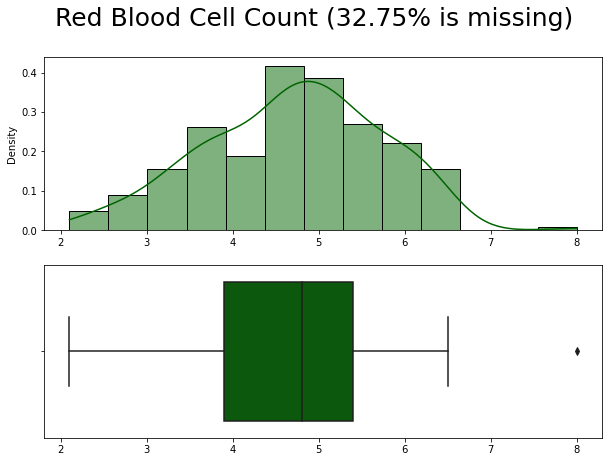

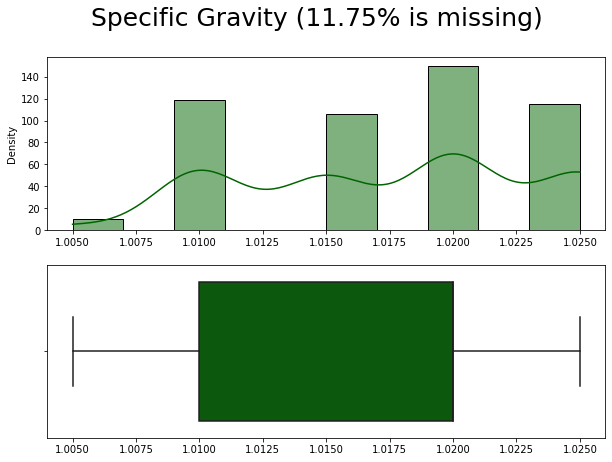

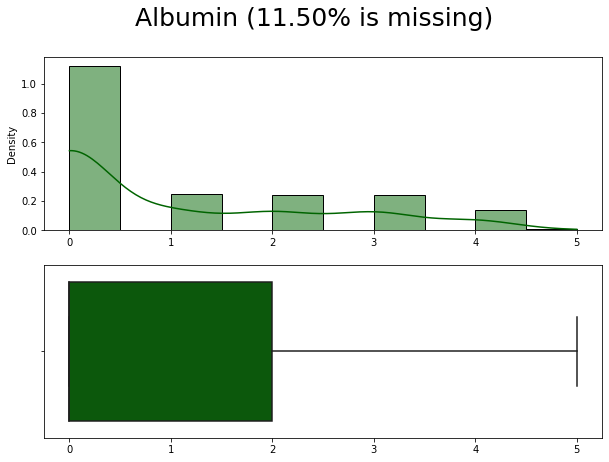

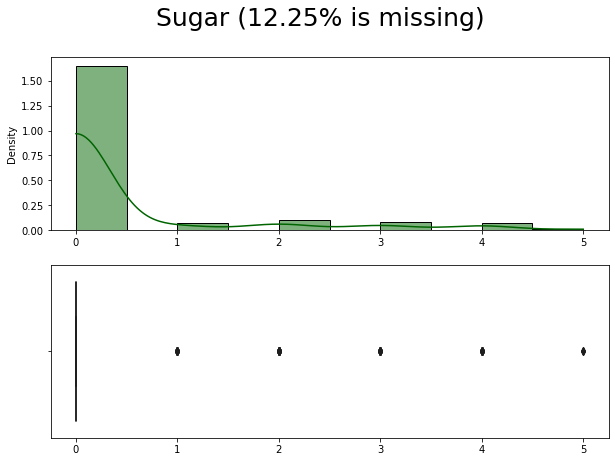

In [ ]:
for col in numerical_attributes:
  
  miss_perc="%.2f"%(100*(1-(df_data[col].dropna().shape[0])/df_data.shape[0]))

  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,7)) #subplots divides your graph into 2 parts
  

  fig.suptitle('{} ({}% is missing)'.format(col, miss_perc), fontsize=25) 

  sns.histplot(data=df_data, x=col,  kde=True, color="darkgreen", stat = 'density', ax=axes[0])
  sns.boxplot(data=df_data, x=col, color="darkgreen", ax=axes[1])
 
  axes[0].set_xlabel(None)
  axes[1].set_xlabel(None)
  plt.show()

  print("\n")

# **NUMERICAL FEATURES VS TARGET VARIABLE**



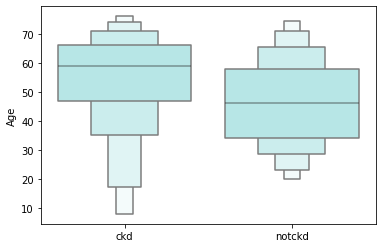

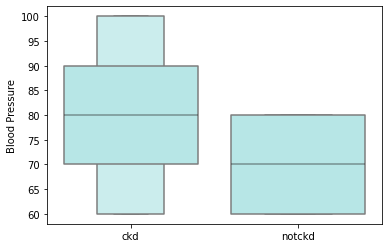

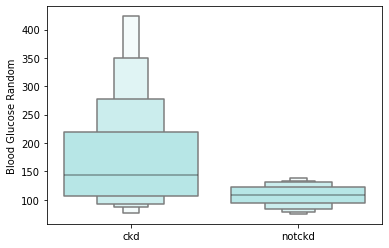

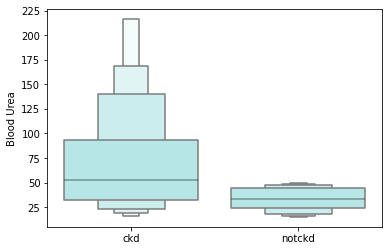

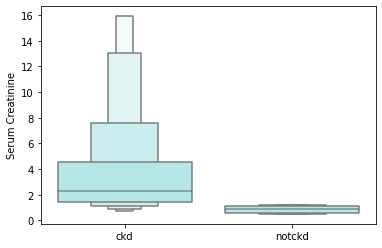

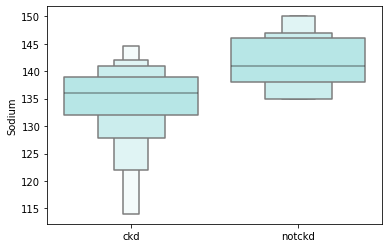

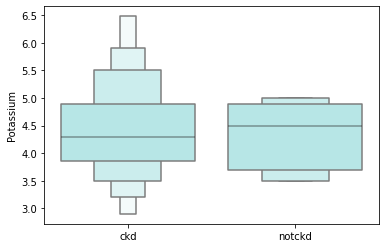

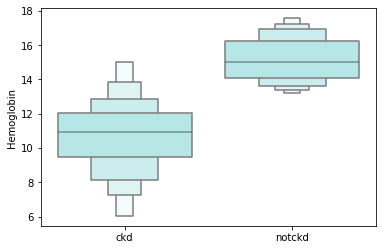

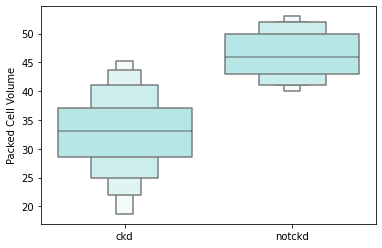

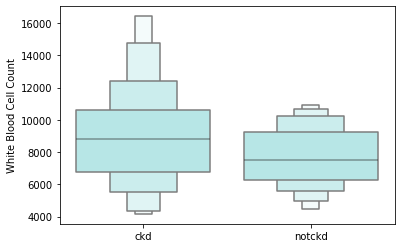

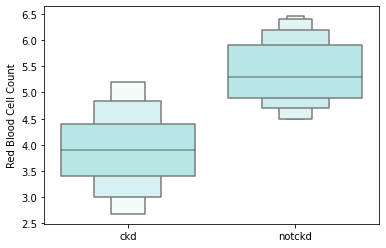

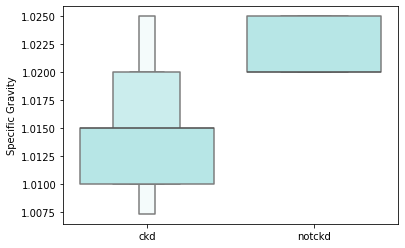

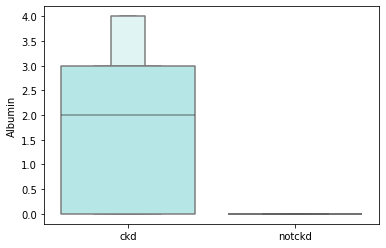

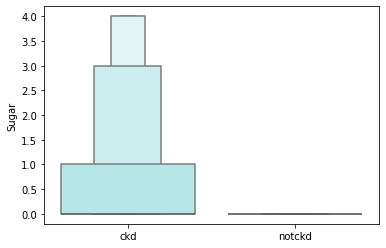

In [ ]:
for col in numerical_attributes:
  
  sns.boxenplot(y=col, x='CKD', data=df_data, color="paleturquoise" , showfliers=False) 
  plt.xlabel(None)
  plt.show()

  print("\n")

# **CORRELATION MATRIX**

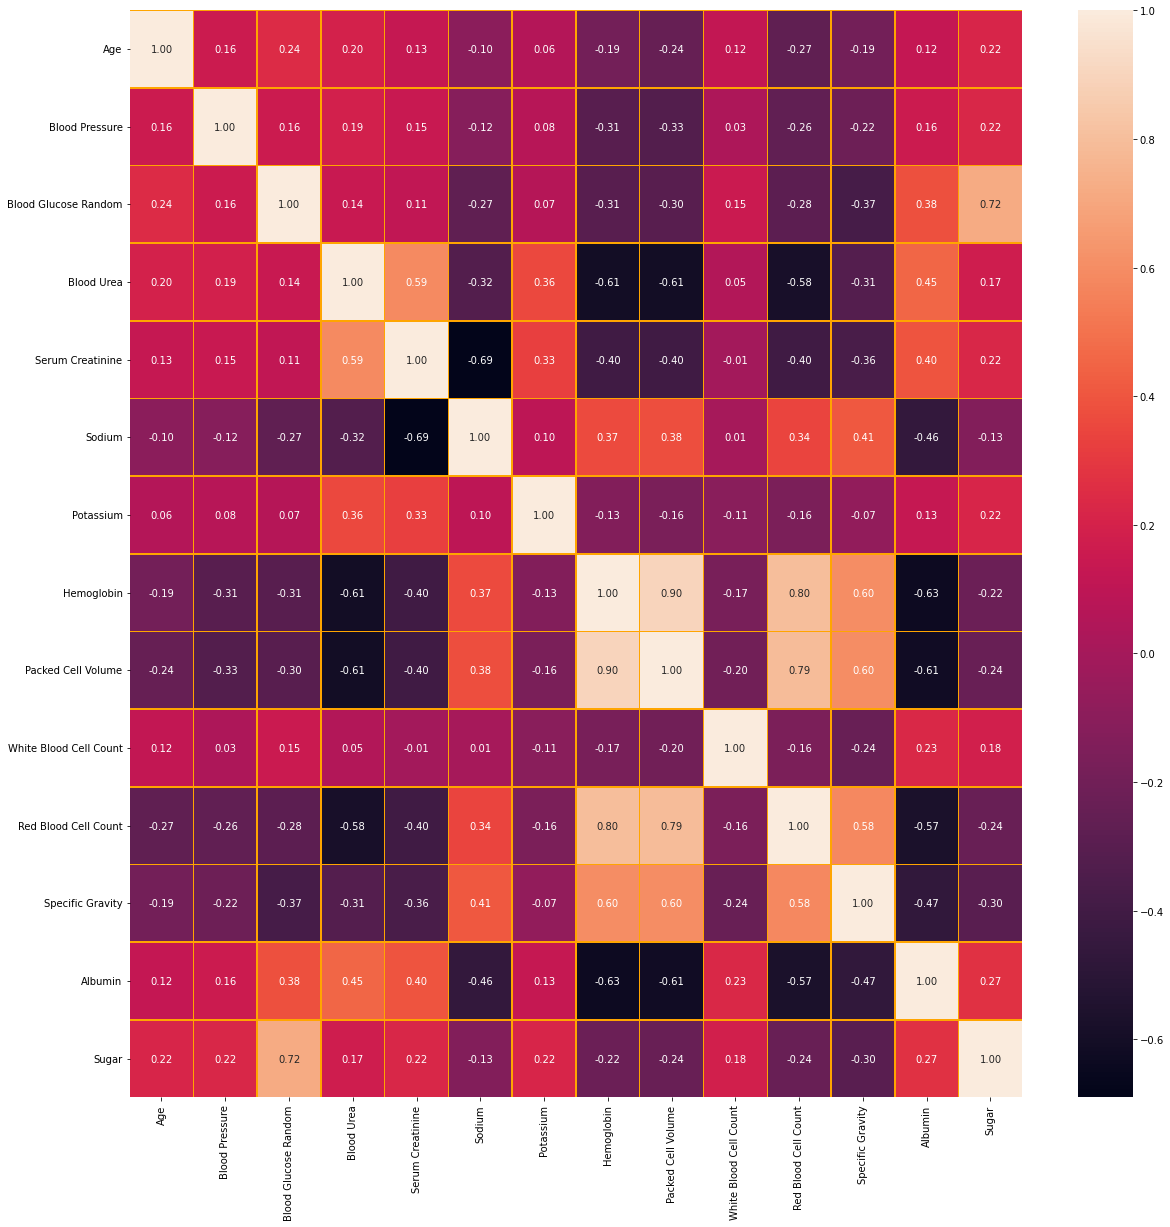

In [ ]:
#HEAT MAP #correlation of parameters 
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df_data[numerical_attributes].corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")

plt.show()

# **DISTRIBUTION OF CATEGORICAL FEATURES**

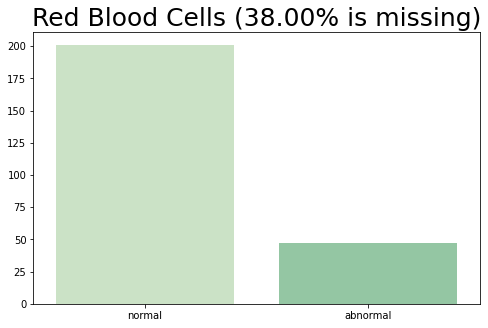

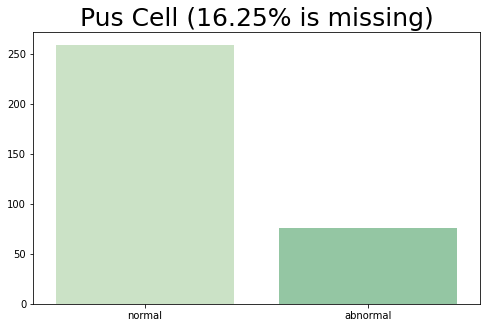

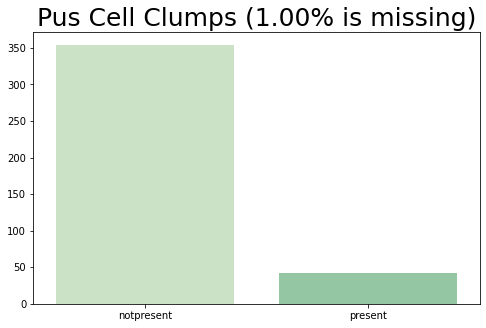

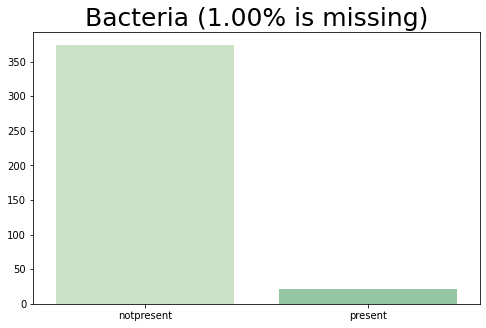

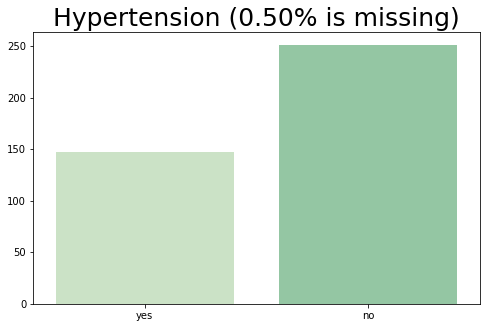

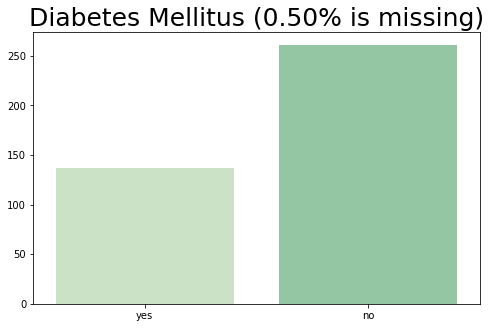

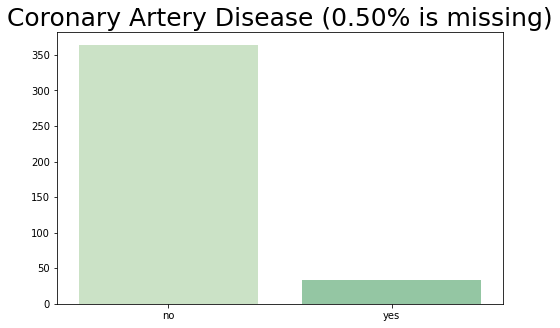

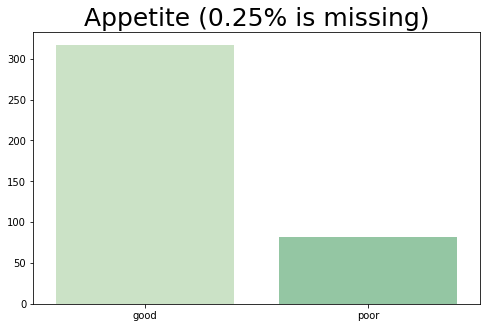

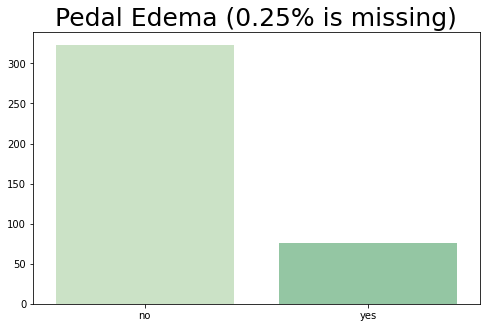

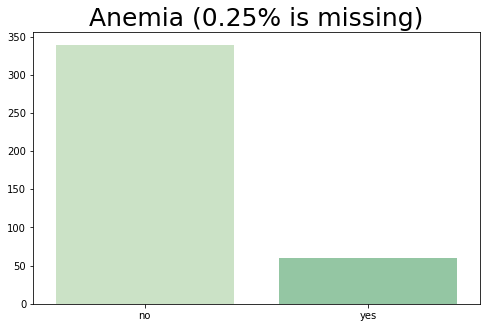

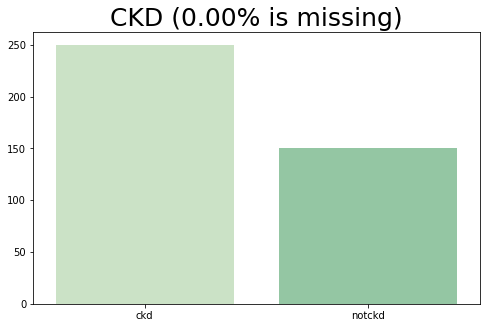

In [ ]:

for col in nominal_features:
  
  miss_perc="%.2f"%(100*(1-(df_data[col].dropna().shape[0])/df_data.shape[0]))

  
  plt.figure(figsize=(8,5))
  sns.countplot(data=df_data, x=col, palette=sns.cubehelix_palette(rot=-.45,light=.85,hue=1))
  
  plt.title('{} ({}% is missing)'.format(col, miss_perc), fontsize=25) 
  plt.xlabel(None) #to remove the title of the x axis
  plt.ylabel(None)
  plt.show()
  print('\n')

# **CATEGORICAL FEATURES VS TARGET VARIABLE**

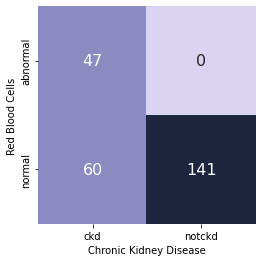

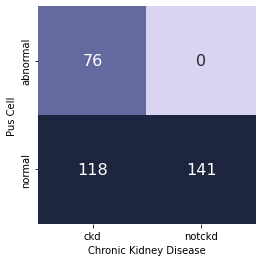

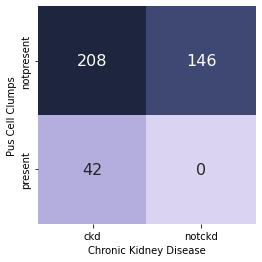

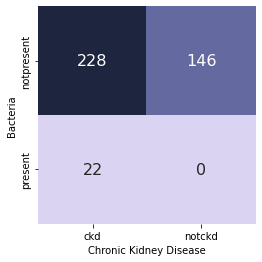

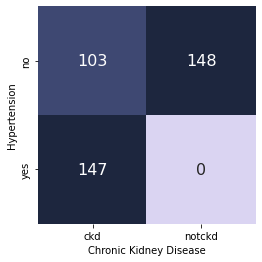

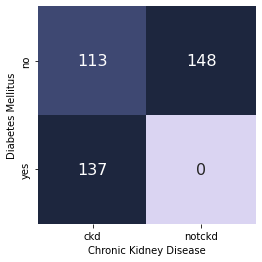

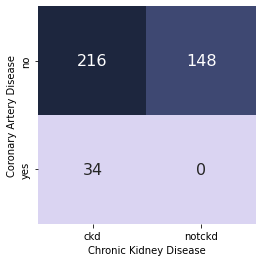

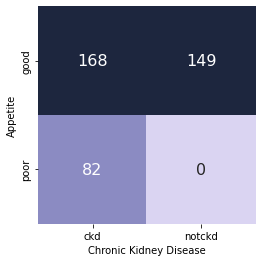

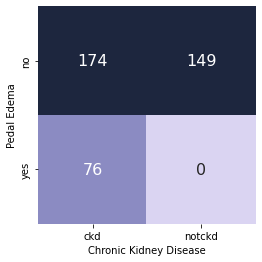

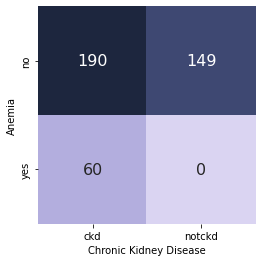

In [ ]:
for col in nominal_attributes[:-1]:
  
  sns.heatmap(pd.crosstab(df_data[col],
                          df_data['CKD']),
                          cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                          square='True',
                          cbar=False,
                          annot=True,
                          annot_kws={'fontsize':16},
                          fmt='d')
  plt.xlabel('Chronic Kidney Disease')
  plt.ylabel(col)

  plt.show()

  print("\n")

# **NUMERICAL AND CATEGORICAL FEATURES: DISTRIBUTIONS AND CORRELATIONS**


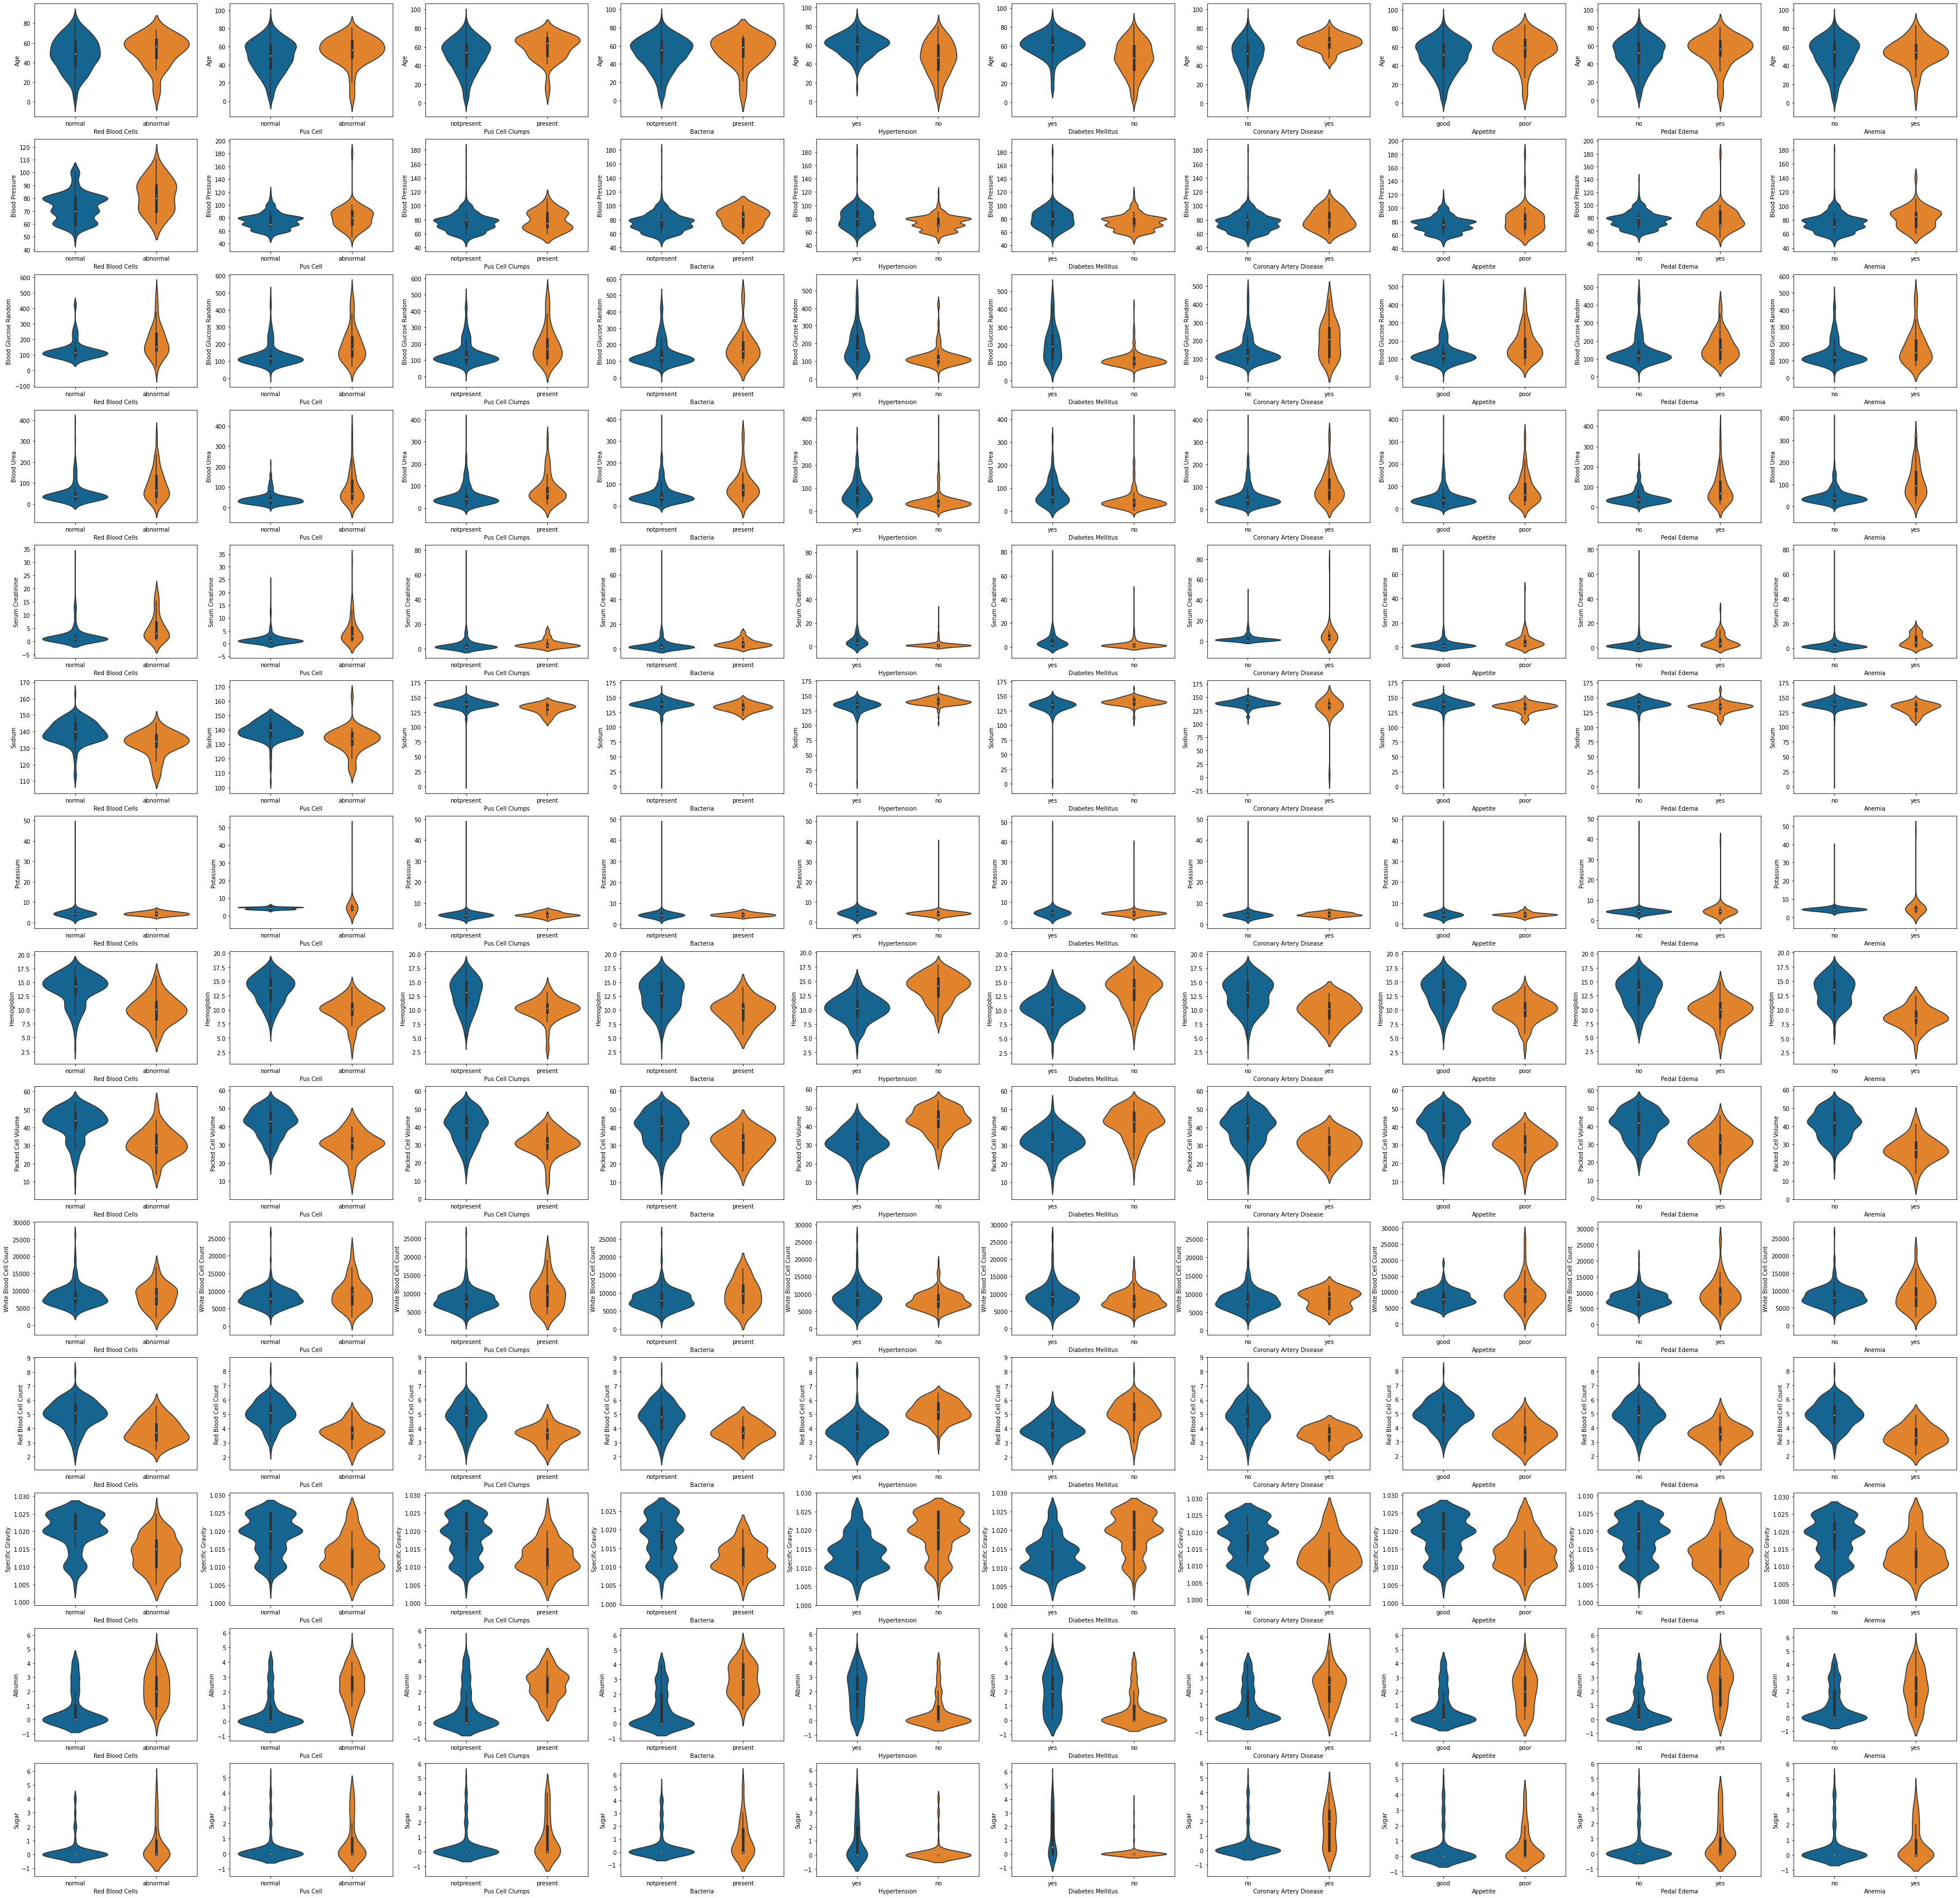

In [ ]:
n_rows, n_cols = (14,10)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(60, 60))

for i in range(14):
    for j in range(10):
        sns.violinplot(y=df_data[numerical_attributes[i]],
                             x=df_data[nominal_attributes[j]], 
                             data=df_data,
                             ax=axes[i,j])
plt.show()

# **FILLING NaN VALUES**

In [ ]:
# For numerical features with their medians
# For categorical features with their mode


for col in df_data.columns:
    if col in numerical_attributes:
        df_data[col].fillna(df_data[col].median(), inplace=True)
    else:
        df_data[col].fillna(df_data[col].mode()[0], inplace=True)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood Pressure           400 non-null    float64
 2   Specific Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red Blood Cells          400 non-null    object 
 6   Pus Cell                 400 non-null    object 
 7   Pus Cell Clumps          400 non-null    object 
 8   Bacteria                 400 non-null    object 
 9   Blood Glucose Random     400 non-null    float64
 10  Blood Urea               400 non-null    float64
 11  Serum Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

# **LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in nominal_attributes:
    df_data[col]=encoder.fit_transform(df_data[col])


In [ ]:
df_data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,CKD
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


# **FEATURES SCALING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = StandardScaler()
arr = scaler.fit_transform(df_data)
rs_data = pd.DataFrame(arr, columns=df_data.columns)
rs_data

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,CKD
0,-0.210031,0.254214,0.421486,0.076249,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,...,0.603224,-0.197314,0.550044,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597
1,-2.627234,-1.972476,0.421486,2.363728,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.320122,...,-0.132789,-0.909782,0.074073,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597
2,0.615355,0.254214,-1.421074,0.838742,2.507853,0.36489,0.484322,-0.342518,-0.241249,3.697618,...,-0.991470,-0.316059,0.074073,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476,-0.774597
3,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,0.36489,-2.064742,2.919556,-0.241249,-0.373337,...,-0.868801,-0.632711,-0.996862,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476,-0.774597
4,-0.033163,0.254214,-1.421074,0.838742,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.519679,...,-0.500795,-0.395222,-0.163913,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.202662,0.254214,0.421486,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.067350,...,0.971230,-0.632711,0.193066,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994
396,-0.563768,-0.488016,1.342766,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.932096,...,1.829911,-0.197314,1.739973,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994
397,-2.332453,0.254214,0.421486,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.599501,...,1.216567,-0.672293,0.788030,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994
398,-2.037673,-1.230246,1.342766,-0.686244,-0.380269,0.36489,0.484322,-0.342518,-0.241249,-0.413248,...,1.461905,-0.434803,1.382994,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994


# **CLASSIFICATION ALGORITHMS**

In [ ]:
#Preparing the test and training set
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score

pca = PCA(n_components=2)

y=df_data["CKD"].values
x=rs_data.drop(["CKD"],axis=1)

pca.fit(x)

x_pca = pca.transform(x)

#Normalization
#x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

X_train_pca, X_test,y_train_pca,y_test=train_test_split(x_pca,y,test_size=0.25, random_state=10)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train_pca, y_train_pca)


KNN:

Accuracy = 98.0%
Precision =  94.12%
Recall KNN =  100.0%
F1 KNN =  96.97%




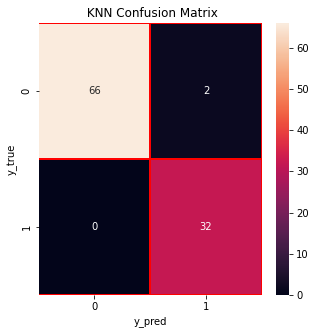

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.predict(X_test)

Y_pred_knn = knn.predict(X_test)

score_knn = knn.score(X_test,y_test)
precision_knn = average_precision_score(y_test,Y_pred_knn)
recall_knn = recall_score(y_test,Y_pred_knn)
f1_score_knn = f1_score(y_test,Y_pred_knn)

#score.append(knn.score(x_test,y_test)*100)
#algorithms.append("KNN")
print('KNN:\n')
print("Accuracy =",round(score_knn*100,2).astype(str)+'%')
print('Precision = ',round(precision_knn*100,2).astype(str)+'%')
print('Recall KNN = ',round(recall_knn*100,2).astype(str)+'%')
print('F1 KNN = ',round(f1_score_knn*100,2).astype(str)+'%')

print('\n')
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()

Random Forest accuracy = 99.0%
Precision Random Forest  96.97%
Recall Random Forest 100.0%
F1 Random Forest 98.46%




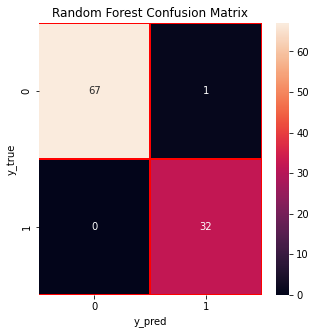

In [ ]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train,y_train)
#score.append(rf.score(x_test,y_test)*100)
#algorithms.append("Random Forest")

Y_pred_rf = rf.predict(X_test)

score_rf = rf.score(X_test,y_test)
precision_rf = average_precision_score(y_test,Y_pred_rf)
recall_rf = recall_score(y_test,Y_pred_rf)
f1_score_rf = f1_score(y_test,Y_pred_rf)

print("Random Forest accuracy =",round(score_rf*100,2).astype(str)+'%')
print('Precision Random Forest ',round(precision_rf*100,2).astype(str)+'%')
print('Recall Random Forest',round(recall_rf*100,2).astype(str)+'%')
print('F1 Random Forest',round(f1_score_rf*100,2).astype(str)+'%')

print('\n')

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

SVM:

Accuracy =  98.0%
Precision =  94.12%
Recall KNN =  100.0%
F1 KNN =  96.97%




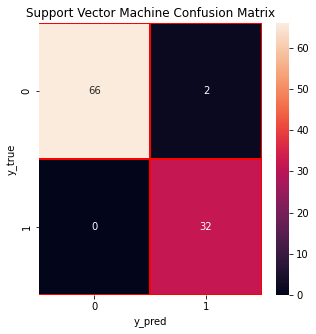

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,y_train)
#score.append(svm.score(x_test,y_test)*100)
#algorithms.append("Support Vector Machine")

Y_pred_svm = svm.predict(X_test)

score_svm = svm.score(X_test,y_test)
precision_svm = average_precision_score(y_test,Y_pred_svm)
recall_svm = recall_score(y_test,Y_pred_svm)
f1_score_svm = f1_score(y_test,Y_pred_svm)

print("SVM:\n")
print("Accuracy = ",round(svm.score(X_test,y_test)*100,2).astype(str)+'%')
print('Precision = ',round(precision_svm*100,2).astype(str)+'%')
print('Recall KNN = ',round(recall_svm*100,2).astype(str)+'%')
print('F1 KNN = ',round(f1_score_svm*100,2).astype(str)+'%')

print('\n')

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

Decision Tree:

Accuracy =  99.0%
Precision =  96.97%
Recall KNN =  100.0%
F1 KNN =  98.46%




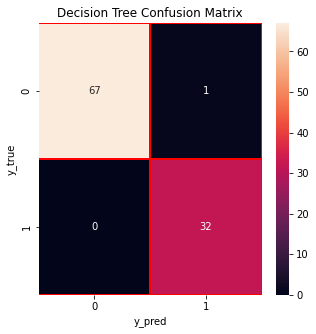

In [ ]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

Y_pred_dt = dt.predict(X_test)

score_dt = dt.score(X_test,y_test)
precision_dt = average_precision_score(y_test,Y_pred_dt)
recall_dt = recall_score(y_test,Y_pred_dt)
f1_score_dt = f1_score(y_test,Y_pred_dt)

print("Decision Tree:\n")
print("Accuracy = ",round(score_dt*100,2).astype(str)+'%')
print('Precision = ',round(precision_dt*100,2).astype(str)+'%')
print('Recall KNN = ',round(recall_dt*100,2).astype(str)+'%')
print('F1 KNN = ',round(f1_score_dt*100,2).astype(str)+'%')

print('\n')

#score.append(dt.score(x_test,y_test)*100)
#algorithms.append("Decision Tree")

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

Logistic regression:

Accuracy =  99.0%
Precision =  88.89%
Recall KNN =  100.0%
F1 KNN =  94.12%




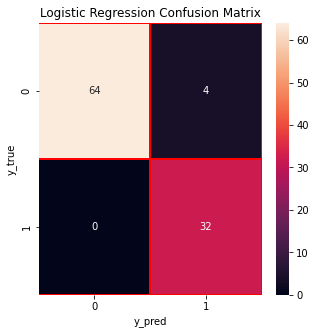

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

#score.append(lr.score(x_test,y_test)*100)
#algorithms.append("Logistic Regression")

Y_pred_lr = lr.predict(X_test)

score_lr = dt.score(X_test,y_test)
precision_lr = average_precision_score(y_test,Y_pred_lr)
recall_lr = recall_score(y_test,Y_pred_lr)
f1_score_lr = f1_score(y_test,Y_pred_lr)

print("Logistic regression:\n")
print("Accuracy = ",round(score_lr*100,2).astype(str)+'%')
print('Precision = ',round(precision_lr*100,2).astype(str)+'%')
print('Recall KNN = ',round(recall_lr*100,2).astype(str)+'%')
print('F1 KNN = ',round(f1_score_lr*100,2).astype(str)+'%')

print('\n')

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(X_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

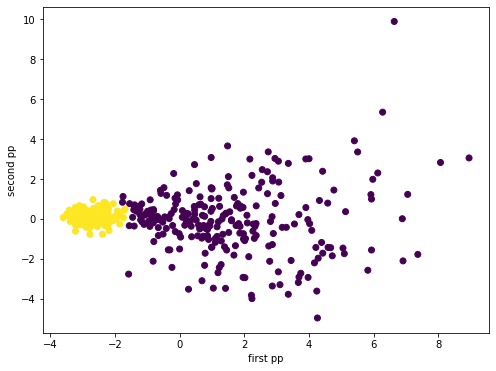

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = df_data['CKD'])
plt.xlabel("first pp")
plt.ylabel('second pp')
plt.show()


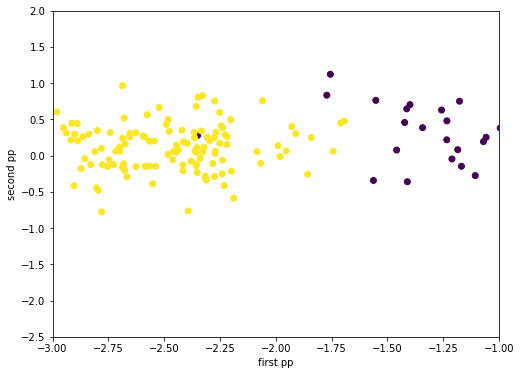

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = df_data['CKD'])
plt.xlim(right=-1,left=-3)
plt.ylim(bottom=-2.5,top=2)
plt.xlabel("first pp")
plt.ylabel('second pp')
plt.show()